In [327]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import mplhep as hep
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'
import uproot,glob, os


plt.rcParams["figure.figsize"] = (10, 8)

In [328]:
def get_df(filename,nevents=1e17):
    with open(filename, "r") as f:
        d={"Q2":[], "x":[], "pT1":[], "pT2":[], "y1":[], "y2":[], "z1":[], "z2":[], "phi1":[], "phi2":[],
          "p1":[], "p2":[], "thetalab1":[], "thetalab2":[],"philab1":[], "philab2":[],}
        d_lead={"Q2":[], "x":[], "pT1":[], "y1":[], "z1":[], "phi1":[],
          "p1":[],  "thetalab1":[],"philab1":[],}
        pT2s=[]
        phi2s=[]
        y2s=[]
        z2s=[]
        p2s=[]
        thetalab2s=[]
        philab22s=[]
        foundLeading=False
        events=0
        while True:
            line=f.readline()
            if line is not None:
                s=line.split()
            else : break
            if events>events:
                break
            if len(s)==0:
                break
            if s[0]=='#':
                nh2=len(pT2s)
                if foundLeading==True:
                    
                    d_lead['Q2'].append(Q2)
                    d_lead['x'].append(x)
                    d_lead['pT1'].append(pT1)
                    d_lead['y1'].append(y1)
                    d_lead['z1'].append(z1)
                    d_lead['p1'].append(p1)
                    d_lead['thetalab1'].append(thetalab1)
                    d_lead['philab1'].append(philab1)
                    d_lead['phi1'].append(phi1)
                    if nh2 >0:
                        d['Q2']+=[Q2]*nh2
                        d['x']+=[x]*nh2
                        d['pT1']+=[pT1]*nh2
                        d['y1']+=[y1]*nh2
                        d['z1']+=[z1]*nh2
                        d['p1']+=[p1]*nh2
                        d['thetalab1']+=[thetalab1]*nh2
                        d['philab1']+=[philab1]*nh2
                        d['phi1']+=[phi1]*nh2
                        d['pT2']+=pT2s
                        d['y2']+=y2s
                        d['z2']+=z2s
                        d['phi2']+=phi2s
                        d['p2']+=p2s
                        d['philab2']+=philab2s
                        d['thetalab2']+=thetalab2s
                    foundLeading=False

                Q2=float(s[1])
                x=float(s[2])
                
                #reset
                pT2s=[]
                phi2s=[]
                y2s=[]
                z2s=[]
                p2s=[]
                thetalab2s=[]
                philab2s=[]
                foundLeading=False
                events+=1
                
                    
            elif s[0]=="211" and float(s[1])>0.5: #leading pi+
                z1=float(s[1])
                pT1=float(s[2])
                phi1=float(s[3])
                y1=float(s[4])
                p1=float(s[5])
                thetalab1=np.pi-float(s[6])
                philab1=float(s[7])
                foundLeading=True
            elif s[0]=="-211" and float(s[1])<0.5: #subleading pi-
                z2s.append(float(s[1]))
                pT2s.append(float(s[2]))
                phi2s.append(float(s[3]))
                y2s.append(float(s[4]))
                p2s.append(float(s[5]))
                thetalab2s.append(np.pi-float(s[6]))
                philab2s.append(float(s[7]))
    return pd.DataFrame(d), pd.DataFrame(d_lead)
            
                

In [370]:
events={}; events_lead={}
for A in "D C Fe Pb".split():
    folder=f"/home/sebouh/eHIJING-pythia/eHIJING-examples/EventsTweak/e{A}"
    events[A],  events_lead[A]= get_df(sorted(glob.glob(f"{folder}/*.dat"), key=os.path.getmtime)[-1],1000)
    print(f"parsed {A}, {len(events[A])} pairs, {len(events_lead[A])} leading")

parsed D, 39634 pairs, 91106 leading
parsed C, 22550 pairs, 45332 leading
parsed Fe, 8064 pairs, 13990 leading
parsed Pb, 6195 pairs, 8784 leading


In [371]:
events['D']

,Q2,x,pT1,pT2,y1,y2,z1,z2,phi1,phi2,p1,p2,thetalab1,thetalab2,philab1,philab2
0,1.19504,0.179553,0.601747,0.267776,1.94041,-0.249101,0.618741,0.087793,-2.301250,1.413400,2.19009,0.278352,0.402813,1.818823,2.473520,-1.48976
1,2.12021,0.453467,0.646996,0.191262,1.61857,0.855888,0.696527,0.132012,3.020870,-2.272610,1.72983,0.297840,0.747903,0.967413,0.139013,-0.56524
2,1.31712,0.304237,0.383961,0.198440,1.98864,1.108070,0.658970,0.176599,-0.134081,2.475980,1.51386,0.382770,0.086143,0.830413,1.745000,2.59866
3,1.00045,0.347533,0.037906,0.177187,2.43116,0.352857,0.540205,0.156280,-2.022480,0.611183,0.81687,0.194928,0.494193,0.781493,2.854140,-1.03322
4,1.12610,0.183268,0.555981,0.490634,2.04096,0.755096,0.685195,0.202346,-2.938680,0.471091,2.23926,0.647696,0.431463,0.700333,-0.180436,2.51840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39629,1.12821,0.168373,0.339610,0.576606,2.45189,1.080870,0.601356,0.273020,2.679190,0.425635,2.14274,0.964840,0.304523,0.503953,0.403398,2.77060
39630,1.31124,0.172404,0.346181,0.158378,2.39916,1.034080,0.511340,0.082504,-2.167450,0.403490,2.06776,0.303870,0.255133,0.440563,0.852089,-2.20913
39631,3.64430,0.464973,0.195082,0.469158,2.92649,0.699752,0.537425,0.147076,-2.633630,1.293140,2.24030,0.598220,0.250803,0.865873,1.282330,-3.11864
39632,1.04019,0.297737,0.235866,0.033506,2.31740,-0.113677,0.754281,0.077596,1.244020,1.147290,1.39733,0.037284,0.370973,1.838823,0.261963,1.93158


In [372]:
def process(df):
    pi=np.pi
    df['dphi']=df.eval(f"phi1-phi2-(phi1-phi2>{np.pi})*{2*pi}+(phi1-phi2<-{np.pi})*{2*np.pi}")
    df['dy']=df.eval("y1-y2")
    Mp=0.9383
    df['nu']=df.eval(f"Q2/(x*2*{Mp})")
    df['W']=df.eval(f"sqrt({Mp**2}+2*{Mp}*nu-Q2)")
def process_lead(df):
    Mp=0.9383
    df['nu']=df.eval(f"Q2/(x*2*{Mp})")
    df['W']=df.eval(f"sqrt({Mp**2}+2*{Mp}*nu-Q2)")

In [373]:
for A in "D C Fe Pb".split():
    process(events[A])
    process_lead(events_lead[A])

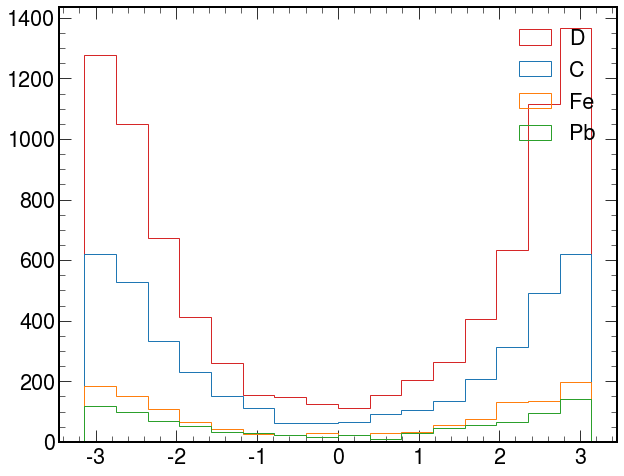

In [374]:
deg=np.pi/180
q=f"pT1>0.25 and pT2>0.25 and Q2>1 and Q2/(x*2*0.9383)>2.2 and Q2/(x*2*0.9383)<4.2 and thetalab1<180-10*{deg}"
colors='tab:red tab:blue tab:orange tab:green'.split()
for i,A in enumerate("D C Fe Pb".split()):
    plt.hist(events[A].query(q).dphi, bins=np.linspace(-np.pi,np.pi, 17), density=False, histtype='step', 
             label=A, color=colors[i])
    
plt.legend()

In [375]:
deg=np.pi/180
#all_data['all'][0]['D'].C
def getPrediction(q_add=None, q_add_lead=None):
    q=f"pT1>0.25 and pT2>0.25 and Q2>1 and nu>2.2 and nu<4.2 and thetalab1>10*{deg} and W>2"
    q+=f" and ((thetalab2>25*{deg} and p2>0.7) or (thetalab2>30*{deg} and p2>0.5) or (thetalab2>40*{deg} and p2>0.35))"
    q+=f" and z2>0.05 and z2<0.45 and z1>0.5"
    q_lead=f"pT1>0.25 and Q2>1 and nu>2.2 and nu<4.2 and W>2"
    if q_add is not None:
        q+= " and " + q_add
    if q_add_lead is not None:
        q_lead+= " and " + q_add_lead
        
    colors='tab:red tab:blue tab:orange tab:green'.split()
    results={}
    for i,A in enumerate("D C Fe Pb".split()):
        #plt.hist(events[A].query(q).dphi, bins=np.linspace(-np.pi,np.pi, 17), density=False, histtype='step', 
        #         label=A, color=colors[i])
        y,x=np.histogram(abs(events[A].query(q).dphi), bins=np.linspace(0,np.pi, 9))
        bc=(x[1:]+x[:-1])/2
        n_lead=len(events_lead[A].query(q_lead))
        
        width=np.sum(y*(bc-np.pi)**2)/np.sum(y)
        if i==0:
            norm = 2*np.pi/8*sum(y/n_lead)
            width_D=width
        
        print(width, np.sqrt(width**2-width_D**2))
        C=y/n_lead/norm
        dCstat = np.sqrt(y)/n_lead/norm
        phi=bc
        phi_low=x[:-1]
        phi_up=x[1:]
        
        bc=list(bc)+list(reversed(np.pi*2-bc))
        y=np.array(list(y)+list(reversed(y)))

        
        plt.fill_between(bc, (y-np.sqrt(y))/n_lead/norm,  (y+np.sqrt(y))/n_lead/norm,label=A, color=colors[i], alpha=0.5)
        results[A]=pd.DataFrame({'C':C, 'dCstat':dCstat, "phi":phi,"phi_low":phi_low, "phi_up": phi_up})
        results[A]['R'] = results[A]['C']/results['D']['C']
        results[A]['dRstat'] = results[A]['R']*np.hypot(results[A]['dCstat']/results[A]['C'],results['D']['dCstat']/results['D']['C'])
    plt.legend()
    plt.show()
    return results
all_eHIJING={}

1.1435619230584304 0.0
1.2201228301141196 0.4254008094686625
1.2686949407409935 0.5494114858580021
1.3055969504397136 0.6299599393043851


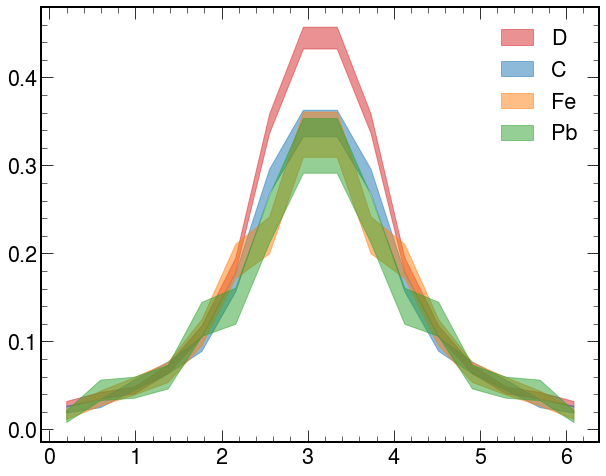

In [376]:
all_eHIJING['all']=[getPrediction()]

dY bins
0.7005388032404317 0.0
0.8627055588810818 0.5034940580372159
0.647495080399993 nan
0.501190848492819 nan


/tmp/ipykernel_402846/52453914.py:27: RuntimeWarning: invalid value encountered in sqrt
  print(width, np.sqrt(width**2-width_D**2))
/tmp/ipykernel_402846/52453914.py:27: RuntimeWarning: invalid value encountered in sqrt
  print(width, np.sqrt(width**2-width_D**2))


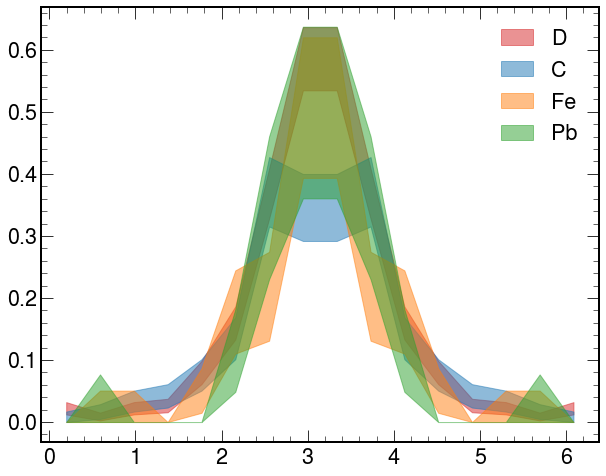

1.0316552525116154 0.0
1.0867193698601658 0.3415353990356945
1.1451948316826719 0.4971505229584881
1.27714932943164 0.7528597808575531


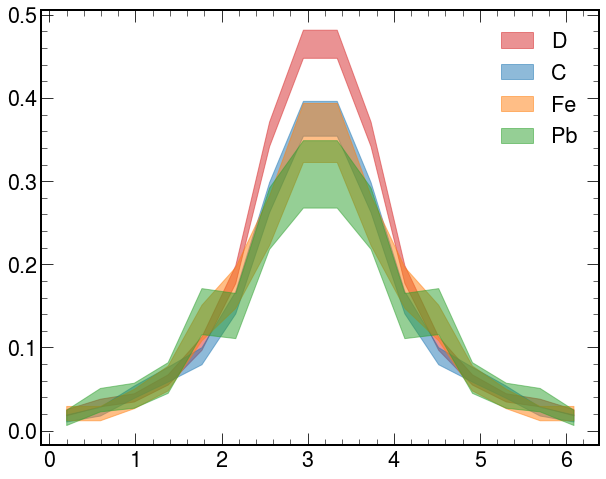

1.389234254616927 0.0
1.4598745298919613 0.44862214482371043
1.6350037120412588 0.8621283687407849
1.484128352025224 0.5221734875346108


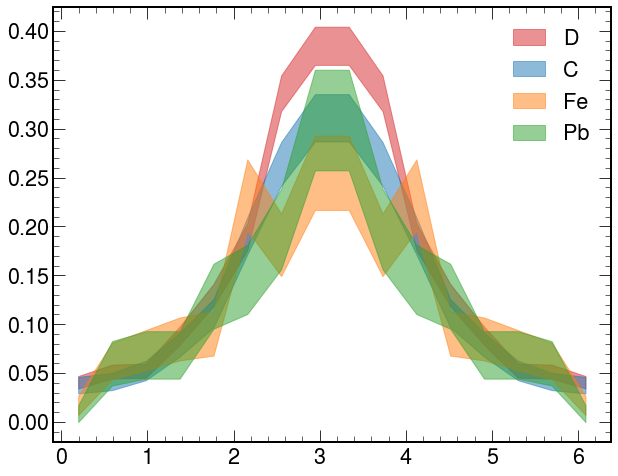

pT1 bins
1.6557011606134913 0.0
1.721773127183779 0.47239429318668474
1.630797914711249 nan
1.7292836688556423 0.4990748181525177


/tmp/ipykernel_402846/52453914.py:27: RuntimeWarning: invalid value encountered in sqrt
  print(width, np.sqrt(width**2-width_D**2))


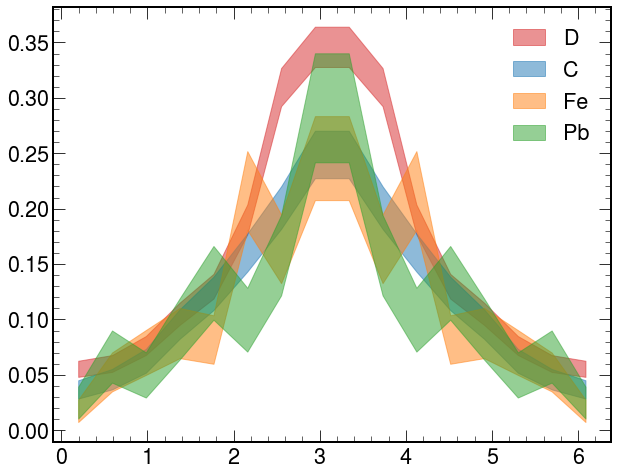

0.9801048312569349 0.0
1.1388182660594544 0.5799151341855783
1.2560207903524494 0.7854824921947062
1.3861337431097254 0.9801843059007797


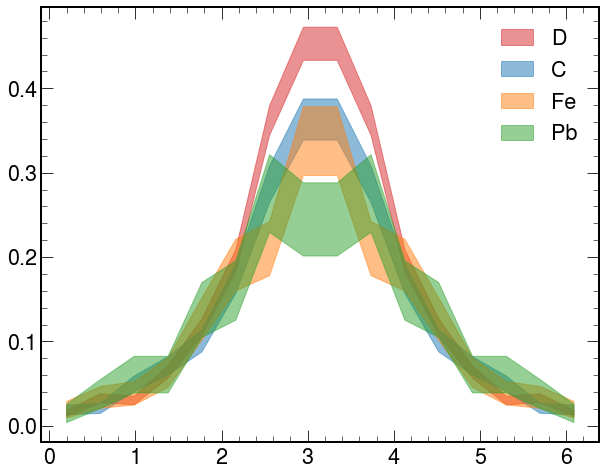

0.6331120269878299 0.0
0.7350437109892878 0.37344131848024664
0.9142217144912044 0.659522937076944
0.6382686873968378 0.08096961525562345


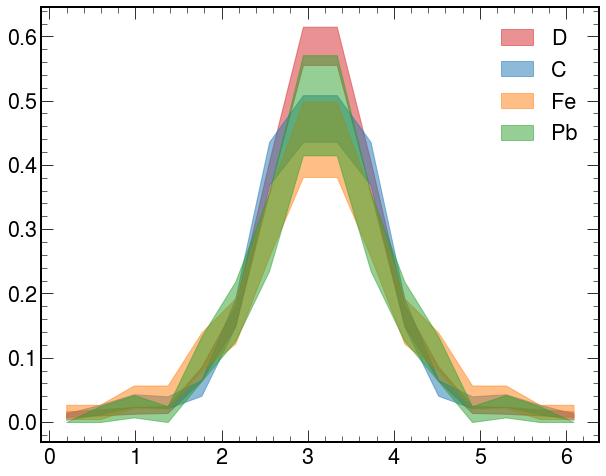

pT2 bins
1.5060569307397884 0.0
1.6143596117521881 0.5813342217926994
1.5566172943096663 0.3935097486906703
1.4480400401452551 nan


/tmp/ipykernel_402846/52453914.py:27: RuntimeWarning: invalid value encountered in sqrt
  print(width, np.sqrt(width**2-width_D**2))


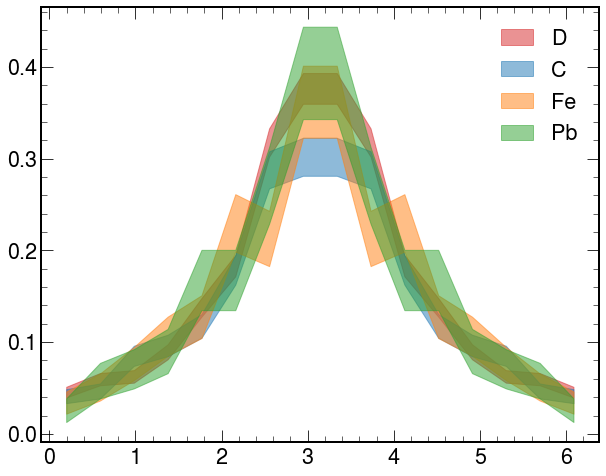

0.8999609364066129 0.0
0.8534628329023667 nan
1.0337179948262272 0.5085697648992596
1.1556835616063972 0.7250343491927673


/tmp/ipykernel_402846/52453914.py:27: RuntimeWarning: invalid value encountered in sqrt
  print(width, np.sqrt(width**2-width_D**2))


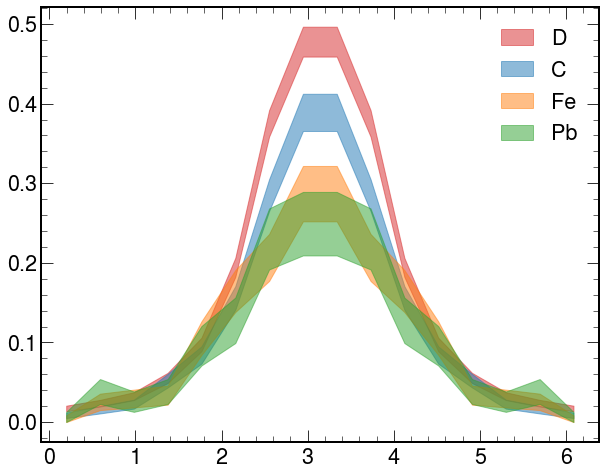

0.3678676316703344 0.0
0.5943962471981615 0.4668836088925345
0.3106929694276751 nan
0.6554034172598401 0.5424269950188091


/tmp/ipykernel_402846/52453914.py:27: RuntimeWarning: invalid value encountered in sqrt
  print(width, np.sqrt(width**2-width_D**2))


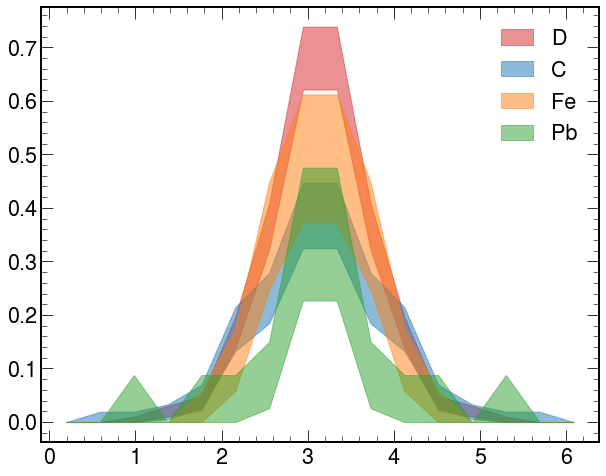

In [377]:
print("dY bins")
all_eHIJING['dY']=[getPrediction(f"{v1}<dy and dy<{v2}") for v1, v2 in [(-0.5, 0.5), (0.5, 1.5), (1.5, 2.5)]]
print("pT1 bins")
all_eHIJING['pT1']=[getPrediction(f"{v1}<pT1 and pT1<{v2}", f"{v1}<pT1 and pT1<{v2}") \
                    for v1, v2 in [(0.25, 0.4), (0.4, 0.6), (0.6, 1.0)]]
print("pT2 bins")
all_eHIJING['pT2']=[getPrediction(f"{v1}<pT2 and pT2<{v2}") for v1, v2 in [(0.25, 0.4), (0.4, 0.6), (0.6, 0.8)]]

In [378]:
import pickle
with open("eHIJING_results_tweak.pkl", "wb") as f:
    pickle.dump(all_eHIJING, f, pickle.HIGHEST_PROTOCOL)

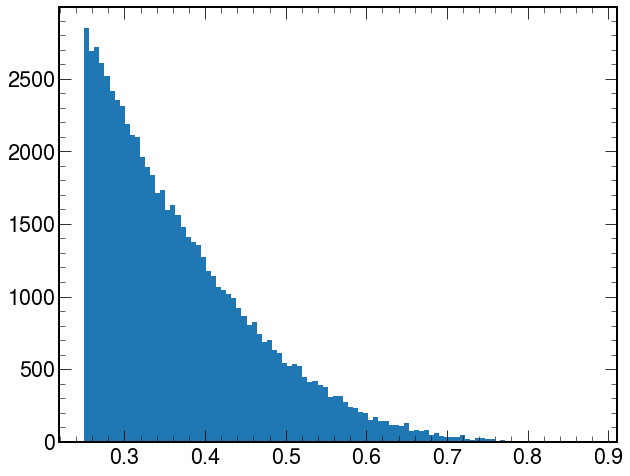

In [271]:
plt.hist(events['D'].query(q).eval(f"pT2"), bins=100)
plt.show()

In [ ]:
plt.hist(